2021-12-21 <br/>
Starbucks drinks <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-12-21/readme.md

Multiple Plots - Completed <br/>
Gauge Plots - Completed 

https://plotly.com/python/indicator/ <br/>
https://plotly.com/python/gauge-charts/

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-12-21/starbucks.csv')

In [3]:
df.head()

,product_name,size,milk,whip,serv_size_m_l,calories,total_fat_g,saturated_fat_g,trans_fat_g,cholesterol_mg,sodium_mg,total_carbs_g,fiber_g,sugar_g,caffeine_mg
0,brewed coffee - dark roast,short,0,0,236,3,0.1,0.0,0.0,0,5,0,0,0,130
1,brewed coffee - dark roast,tall,0,0,354,4,0.1,0.0,0.0,0,10,0,0,0,193
2,brewed coffee - dark roast,grande,0,0,473,5,0.1,0.0,0.0,0,10,0,0,0,260
3,brewed coffee - dark roast,venti,0,0,591,5,0.1,0.0,0.0,0,10,0,0,0,340
4,brewed coffee - decaf pike place roast,short,0,0,236,3,0.1,0.0,0.0,0,5,0,0,0,15


In [4]:
df_size=df[df['size'].isin(['grande','short','tall','venti'])].iloc[:,1:]

In [5]:
df_size.mean()

d:\Users\DComputer\Desktop\learning\Streamlined EDA and ML\project_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



milk                 2.563470
whip                 0.254795
serv_size_m_l      466.239269
calories           235.193607
total_fat_g          6.446301
saturated_fat_g      4.046027
trans_fat_g          0.126210
cholesterol_mg      15.865753
sodium_mg          145.669406
total_carbs_g       38.621005
fiber_g              0.902283
sugar_g             35.852055
caffeine_mg         89.011872
dtype: float64

In [6]:
df_size_grouped= df_size.groupby(['size']).mean()

In [7]:
df_size_grouped.loc['mean']=df_size_grouped.mean()

In [8]:
df_size_grouped

,milk,whip,serv_size_m_l,calories,total_fat_g,saturated_fat_g,trans_fat_g,cholesterol_mg,sodium_mg,total_carbs_g,fiber_g,sugar_g,caffeine_mg
size,,,,,,,,,,,,,
grande,2.589820,0.257485,473.000000,247.913174,6.672156,4.185030,0.135629,16.775449,150.934132,41.077844,1.083832,37.688623,93.293413
short,2.455285,0.186992,236.000000,116.439024,3.956098,2.513008,0.078049,9.390244,63.292683,16.162602,0.471545,14.609756,59.918699
tall,2.578616,0.264151,354.000000,182.289308,5.256918,3.299686,0.104717,13.333333,114.022013,29.433962,0.644654,27.591195,62.100629
venti,2.562500,0.268750,659.218750,320.137500,8.349687,5.231875,0.156250,19.921875,203.287500,53.818750,1.134375,50.309375,122.468750
mean,2.546555,0.244344,430.554688,216.694752,6.058715,3.807400,0.118661,14.855225,132.884082,35.123290,0.833602,32.549737,84.445373


In [9]:
df_short=df[df['size'].isin(['short'])]

In [10]:
df_short.product_name

0                          brewed coffee - dark roast
4              brewed coffee - decaf pike place roast
8                        brewed coffee - medium roast
12      brewed coffee - True North Blend Blonde roast
16                                        Caffè Misto
                            ...                      
1109                              White Hot Chocolate
1110                              White Hot Chocolate
1111                              White Hot Chocolate
1112                              White Hot Chocolate
1113                              White Hot Chocolate
Name: product_name, Length: 123, dtype: object

In [11]:
# Reference Metrics
max =df_short.max()
min= df_short.min()
q1= df_short.quantile(.25)
q4= df_short.quantile(0.75)
median=df_short.median()
val= df_short[df_short.product_name=='Caffè Misto'].iloc[1]



d:\Users\DComputer\Desktop\learning\Streamlined EDA and ML\project_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [15]:
# Gague Chart
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 0], 'y': [0, 0]},
    value = val.total_fat_g,
    mode = "gauge+number",
    title = {'text': "Total Fat (g)"},
    gauge = {'axis': {'range': [0, max.total_fat_g]},
             'steps' : [
                 {'range': [q1.total_fat_g, q4.total_fat_g], 'color': "lightgray"},
                 {'range': [q4.total_fat_g, max.total_fat_g], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': max.total_fat_g}}
             ))

fig.show()

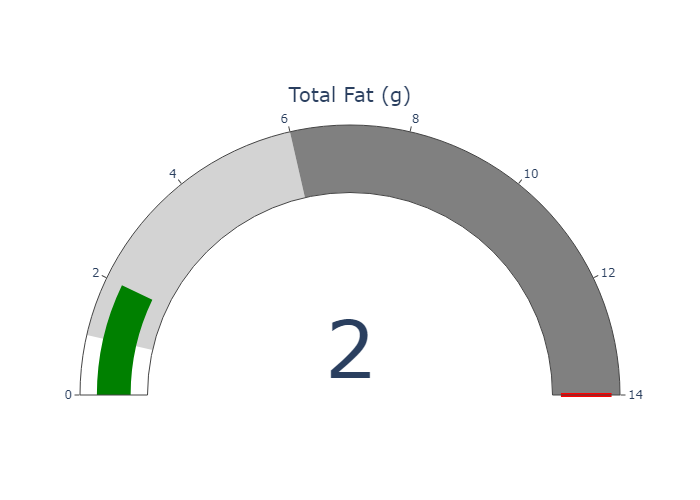

In [16]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [21]:

fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet"},
    delta = {'reference': median.cholesterol_mg},
    value = val.cholesterol_mg,
    domain = {'row': 0, 'column': 0 },
    title = {'text': "Cholestrol (mg)"}))

fig.show()

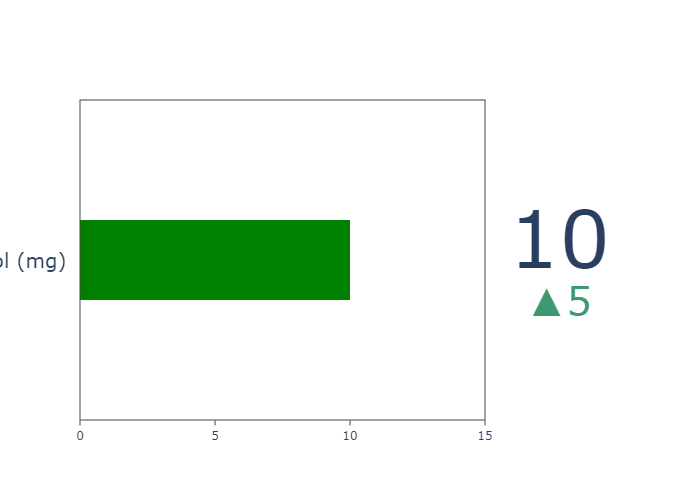

In [22]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [24]:
# Grouped Together

fig = go.Figure()

fig.add_trace(go.Indicator(
    value = val.total_fat_g,
    mode = "gauge+number",
    title = {'text': "Total Fat (g)"},
    domain ={'row' :0 , 'column':0},
    gauge = {'axis': {'range': [0, max.total_fat_g]},
             'steps' : [
                 {'range': [q1.total_fat_g, q4.total_fat_g], 'color': "lightgray"},
                 {'range': [q4.total_fat_g, max.total_fat_g], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': max.total_fat_g}}
))

fig.add_trace(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet"},
    delta = {'reference': median.cholesterol_mg},
    value = val.cholesterol_mg,
    domain = {'row': 1, 'column': 1 },
    title = {'text': "Cholestrol (mg)"}
    ))




fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},
    title = 'How does a small Caffè Misto at Starbucks feel?'
)

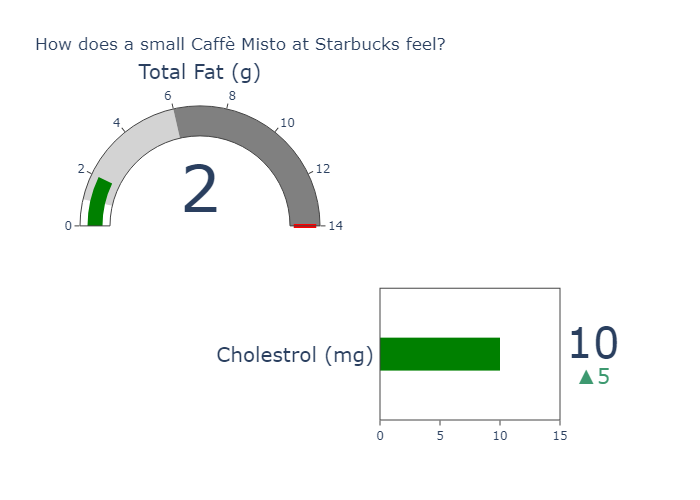

In [25]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)
